# Exercise 13

This particular Automobile Data Set includes a good mix of categorical values as well as continuous values and serves as a useful example that is relatively easy to understand. Since domain understanding is an important aspect when deciding how to encode various categorical values - this data set makes a good case study.

Read the data into Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [2]:
df.shape

(205, 26)

In [3]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [4]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [5]:
obj_df.shape

(205, 10)

# Exercise 13.1

Does the database contain missing values? If so, replace them using one of the methods explained in class

**Se identifican las variables con valores Nulos**

In [6]:
dfColsNa = df[df.columns[df.isna().any()]].isnull().sum()
dfColsNa

normalized_losses    41
num_doors             2
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

**Se identifican los tipos de datos para cada una de las variables con valores nulos**

In [7]:
for col in dfColsNa.index:
  print(col,':',df[col].dtypes)

normalized_losses : float64
num_doors : object
bore : float64
stroke : float64
horsepower : float64
peak_rpm : float64
price : float64


#### Como ayuda adicional, se grafican la cantidad y el porcentaje de valores nulos dentro del dataframe

Text(0.5, 1.0, 'Variables with missing values')

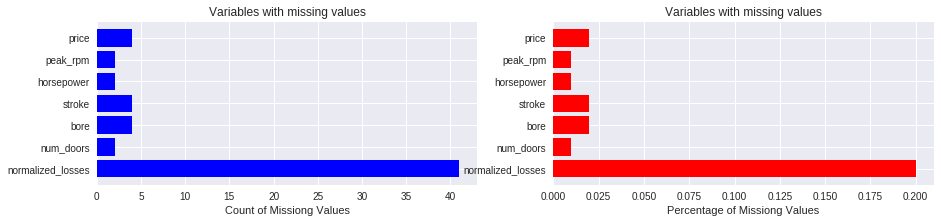

In [8]:
percentcount=[]
labels=[]
valuecount=[]
for col in dfColsNa.index:
  labels.append(col)
  valuecount.append(df[col].isnull().sum() )
  percentcount.append(df[col].isnull().sum() / df.shape[0])

ind = np.arange(len(labels))

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,3))
rects = ax1.barh(ind,np.array(valuecount), color='blue')
ax1.set_yticks(ind)
ax1.set_yticklabels(labels, rotation='horizontal')
ax1.set_xlabel('Count of Missiong Values')
ax1.set_title('Variables with missing values')

rects = ax2.barh(ind,np.array(percentcount), color='red')
ax2.set_yticks(ind)
ax2.set_yticklabels(labels, rotation='horizontal')
ax2.set_xlabel('Percentage of Missiong Values')
ax2.set_title('Variables with missing values')

#### Se analizan las observaciones que tienen NaN  en la variable num_doors

In [9]:
df[df['num_doors'].isnull()]


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


##### Se agrupacion de 'num_doors' tabla para identificar cuantos valores de cada categoría num_doors existen en la BD

In [10]:
df.groupby('num_doors').size()

num_doors
four    114
two      89
dtype: int64

##### Se completamn los valores NaN de num_doors con el valor "two"

In [0]:
df['num_doors'].fillna('two',inplace=True)

#### Se analizan las observaciones que tienen NaN  en la variable normalized_losses

In [12]:
df['normalized_losses'][df['normalized_losses'].notnull()].describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized_losses, dtype: float64

In [0]:
df['normalized_losses'].fillna(df['normalized_losses'].mean(),inplace=True)

#### Se analizan las observaciones que tienen NaN  en la variable bore

In [14]:
df['bore'][df['bore'].notnull()].describe()

count    201.000000
mean       3.329751
std        0.273539
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

In [0]:
df['bore'].fillna(df['bore'].mean(),inplace=True)

#### Se analizan las observaciones que tienen NaN  en la variable stroke 

In [16]:
df['stroke'][df['stroke'].notnull()].describe()

count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

In [0]:
df['stroke'].fillna(df['stroke'].mean(),inplace=True)

#### Se analizan las observaciones que tienen NaN  en la variable horsepower 

In [18]:
df['horsepower'][df['horsepower'].notnull()].describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [0]:
df['horsepower'].fillna(df['horsepower'].mean(),inplace=True)

#### Se analizan las observaciones que tienen NaN  en la variable peak_rpm 

In [20]:
df['peak_rpm'][df['peak_rpm'].notnull()].describe()

count     203.000000
mean     5125.369458
std       479.334560
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak_rpm, dtype: float64

In [0]:
df['peak_rpm'].fillna(df['peak_rpm'].mean(),inplace=True)

#### Se analizan las observaciones que tienen NaN  en la variable price

In [22]:
df['price'][df['price'].notnull()].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [0]:
df['price'].fillna(df['price'].mean(),inplace=True)

#### Se valida nuevamente la existencia de valores nulos

In [24]:
dfColsNa = df[df.columns[df.isna().any()]].isnull().sum()
dfColsNa

Series([], dtype: float64)

# Exercise 13.2

Split the data into training and testing sets

Train a Random Forest Regressor to predict the price of a car using the nominal features

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

regr = RandomForestRegressor(max_depth=15, random_state=0,n_estimators=1000)

y = df['price']
X = df.drop('price', axis=1)
X_train_, X_test_, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Se ejecuta el modelo solo con variables explicativas tipo int64 y float64

In [26]:
X_train = X_train_.select_dtypes(include=['int64','float64']).copy()
X_test = X_test_.select_dtypes(include=['int64','float64']).copy()
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
dfResult = pd.DataFrame({'True':y_test})
dfResult['NominalVars'] = regr.predict(X_test)

dfResult.head(10)

,True,NominalVars
15,30760.000000,30542.612423
9,13207.129353,18828.229092
100,9549.000000,9028.210000
132,11850.000000,13782.061000
68,28248.000000,28116.891259
95,7799.000000,7113.996058
159,7788.000000,8130.126622
162,9258.000000,8065.112429
147,10198.000000,10065.560333
182,7775.000000,8460.832896


In [28]:
np.sqrt(mean_squared_error(dfResult['True'], dfResult['NominalVars']))

2480.5483086913796

# Exercise 13.3

Create dummy variables for the categorical features

Train a Random Forest Regressor and compare

### Se crea función fix_columns, para corregir el faltante de variables Dummy entre Train y Test.

In [0]:
def fix_columns( d, columns ):
  #Rellena las columnas faltantes con valores 0
  for c in set( columns ) - set( d.columns ):
    d[c] = 0
    
  #Les da el mismo orden y retorna
  d = d[ columns ]
  return d        

In [0]:
X_train = pd.get_dummies(X_train_)
X_test = pd.get_dummies(X_test_)

X_test = fix_columns( X_test.copy(), X_train.columns )

In [31]:

regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [32]:
dfResult['dummies'] = regr.predict(X_test)
dfResult.head(10)

,True,NominalVars,dummies
15,30760.000000,30542.612423,30995.352423
9,13207.129353,18828.229092,19046.817905
100,9549.000000,9028.210000,8987.406500
132,11850.000000,13782.061000,13755.680367
68,28248.000000,28116.891259,28601.370000
95,7799.000000,7113.996058,6753.180429
159,7788.000000,8130.126622,8115.950771
162,9258.000000,8065.112429,8004.141429
147,10198.000000,10065.560333,10071.085417
182,7775.000000,8460.832896,8294.343234


In [33]:
np.sqrt(mean_squared_error(dfResult['True'], dfResult['dummies']))

2378.548829776885

# Exercise 13.4

Apply two other methods of categorical encoding

compare the results

In [0]:
#!pip install category_encoders
import category_encoders as ce

### Las variables del Dataframe completo para las variables categorigas se codifican con BinaryEncoder

In [0]:
X_total = ce.BinaryEncoder().fit_transform(X, axis=1)

##### Se crean nuevamente los dataframe de Train y Test, usando los indices de y_train y y_test, para conservar el split definido inicialmente.

In [0]:
X_train = X_total.loc[y_train.index]
X_test = X_total.loc[y_test.index]

In [37]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [38]:
dfResult['BinaryEncoder'] = regr.predict(X_test)
dfResult.head(10)

,True,NominalVars,dummies,BinaryEncoder
15,30760.000000,30542.612423,30995.352423,30749.717958
9,13207.129353,18828.229092,19046.817905,19212.740647
100,9549.000000,9028.210000,8987.406500,8970.220667
132,11850.000000,13782.061000,13755.680367,13710.787879
68,28248.000000,28116.891259,28601.370000,28750.889682
95,7799.000000,7113.996058,6753.180429,6874.557558
159,7788.000000,8130.126622,8115.950771,8158.931751
162,9258.000000,8065.112429,8004.141429,8042.910929
147,10198.000000,10065.560333,10071.085417,10310.361821
182,7775.000000,8460.832896,8294.343234,8385.671915


In [39]:
np.sqrt(mean_squared_error(dfResult['True'], dfResult['BinaryEncoder']))

2470.607783537381

### Las variables categorigas se codifican con HashingEncoder

In [0]:
X_total = ce.HashingEncoder().fit_transform(X, axis=1)

##### Se crean nuevamente los dataframe de Train y Test, usando los indices de y_train y y_test, para conservar el split definido inicialmente.

In [0]:
X_train = X_total.loc[y_train.index]
X_test = X_total.loc[y_test.index]

In [42]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [43]:
dfResult['HashingEncoder'] = regr.predict(X_test)
dfResult.head(10)

,True,NominalVars,dummies,BinaryEncoder,HashingEncoder
15,30760.000000,30542.612423,30995.352423,30749.717958,31186.953294
9,13207.129353,18828.229092,19046.817905,19212.740647,18999.653109
100,9549.000000,9028.210000,8987.406500,8970.220667,9011.225000
132,11850.000000,13782.061000,13755.680367,13710.787879,13676.066175
68,28248.000000,28116.891259,28601.370000,28750.889682,28349.304129
95,7799.000000,7113.996058,6753.180429,6874.557558,7023.037000
159,7788.000000,8130.126622,8115.950771,8158.931751,8131.339010
162,9258.000000,8065.112429,8004.141429,8042.910929,7979.360429
147,10198.000000,10065.560333,10071.085417,10310.361821,9903.769425
182,7775.000000,8460.832896,8294.343234,8385.671915,8379.159602


In [44]:
np.sqrt(mean_squared_error(dfResult['True'], dfResult['HashingEncoder']))

2471.893456034546

### Las variables categorigas se codifican con HelmertEncoder

In [0]:
X_total = ce.HelmertEncoder().fit_transform(X, axis=1)

##### Se crean nuevamente los dataframe de Train y Test, usando los indices de y_train y y_test, para conservar el split definido inicialmente.

In [0]:
X_train = X_total.loc[y_train.index]
X_test = X_total.loc[y_test.index]

In [47]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [48]:
dfResult['HelmertEncoder'] = regr.predict(X_test)
dfResult.head(10)

,True,NominalVars,dummies,BinaryEncoder,HashingEncoder,HelmertEncoder
15,30760.000000,30542.612423,30995.352423,30749.717958,31186.953294,31474.305517
9,13207.129353,18828.229092,19046.817905,19212.740647,18999.653109,19493.412017
100,9549.000000,9028.210000,8987.406500,8970.220667,9011.225000,8967.564000
132,11850.000000,13782.061000,13755.680367,13710.787879,13676.066175,13582.818879
68,28248.000000,28116.891259,28601.370000,28750.889682,28349.304129,28782.834129
95,7799.000000,7113.996058,6753.180429,6874.557558,7023.037000,6777.740129
159,7788.000000,8130.126622,8115.950771,8158.931751,8131.339010,8175.633826
162,9258.000000,8065.112429,8004.141429,8042.910929,7979.360429,8016.939667
147,10198.000000,10065.560333,10071.085417,10310.361821,9903.769425,9728.864167
182,7775.000000,8460.832896,8294.343234,8385.671915,8379.159602,8287.665104


In [49]:
np.sqrt(mean_squared_error(dfResult['True'], dfResult['HelmertEncoder']))

2379.005831214595

### Se presentan los resultados la raiz de MSE para para los cinco modelos modelos.  Obteniendo el mejor resultado para las variables codificadas con Dummy

In [50]:
for col in dfResult.columns[1:]:
  print(col,':',np.sqrt(mean_squared_error(dfResult['True'], dfResult[col])))


NominalVars : 2480.5483086913796
dummies : 2378.548829776885
BinaryEncoder : 2470.607783537381
HashingEncoder : 2471.893456034546
HelmertEncoder : 2379.005831214595
